In [1]:
#importing necessary libraries
import numpy as np, pandas as pd, random, matplotlib.pyplot as plt
import string

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from collections import OrderedDict
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.neural_network import MLPClassifier
from sklearn import svm

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/s1890293/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# import the input and output (supervised Learning) 
x = pd.read_csv('x_train.csv')
y = pd.read_csv('y_train.csv')

In [3]:
#converting dataframe to list
x_df = x['text'].values.tolist()
y_df = y["is_positive_sentiment"].values.tolist()

In [4]:
#import the glove vectors with dimension (100000 X 50)
word_embeddings = pd.read_csv('glove.6B.50d.txt.zip',
                               header=None, sep=' ', index_col=0,
                               nrows=100000, compression='zip', encoding='utf-8', quoting=3)

# Build a dict that will map from string word to 50-dim vector
word_list = word_embeddings.index.values.tolist()
word2vec = OrderedDict(zip(word_list, word_embeddings.values))

In [5]:
# create functions for developing the vocabulary 

def word_extraction(text):
    #convert to tokens 
    tokens = word_tokenize(text) 
    # remove punctuation
    table = str.maketrans('', '', string.punctuation) 
    tokens = [w.translate(table) for w in tokens]  
    #remove non-alphabetic words
    tokens = [word for word in tokens if word.isalpha()] 
    stop_words = set(stopwords.words('english')) #list of english stop words 
    tokens = [w for w in tokens if not w in stop_words] #remove english stop words 
    tokens = [word for word in tokens if len(word) > 1] #remove one-lettered words 
    tokens = [w.lower() for w in tokens] #convert all words to lower case 
    return (tokens)

#define a function that averages the word vectors for each word in each line of the corpus
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    doc = [word2vec[word] for word in doc if word in word_list]
    a = np.mean (doc, axis = 0)
    return a

#define a function that converts every sentence in the corpus the input to tokens and returns 
#the glove vector representation
def glovectorize_mean (x_train_df): 
    x_extract =[]
    for sentence in x_train_df:
        tok = word_extraction(sentence)
        #capture errors due to empty array 
        if len (tok) is not  0:
            a = document_vector(word_extraction(sentence))
            x_extract.append (a)
        else: 
            a = np.zeros(50)
            x_extract.append (a)
        #Stack arrays in sequence vertically
        y = np.vstack(x_extract)
    return y


In [6]:
#glove vector representation of the input set
x_extract = glovectorize_mean(x_df)

## Logistic Regression

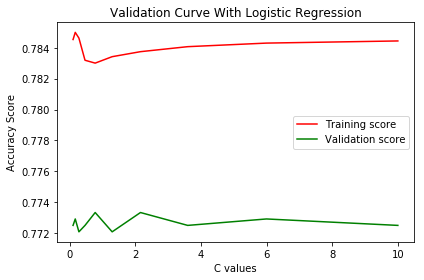

In [7]:
param_range =np.logspace(-1, 1, 10)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(LogisticRegression( random_state=1), 
                                             x_extract, 
                                             y_df, 
                                             param_name="C", 
                                             param_range=param_range,
                                             cv=10, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="r")
plt.plot(param_range, test_mean, label="Validation score", color="g")

# Create plot of Mean Accuracy Score 
plt.title("Validation Curve With Logistic Regression")
plt.xlabel("C values")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.savefig ("figure1b")
plt.show()

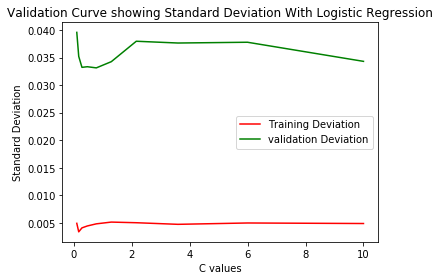

In [8]:
# Create plot of Standard Deviation of Accuracy Score
plt.plot(param_range, train_std, label="Training Deviation", color="r")
plt.plot(param_range, test_std, label="validation Deviation", color="g")
plt.title("Validation Curve showing Standard Deviation With Logistic Regression")
plt.xlabel("C values")
plt.ylabel("Standard Deviation")
plt.tight_layout()
plt.legend(loc="best")
plt.savefig ("figure1c")
plt.show()

In [9]:
#Maximum cross validated accuracy 
max(test_mean)

0.7733333333333333

In [10]:
#value of varied parameter at maximum accuracy 
print ("C value: %r" % param_range[np.argmax(test_mean)]) 

C value: 2.1544346900318834


## Neural Network Model

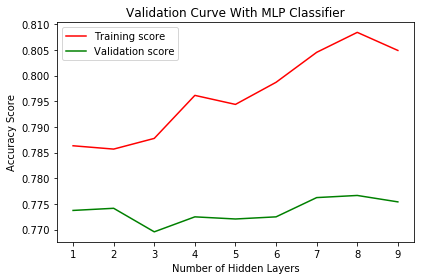

In [11]:
param_range =range (1,10)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(MLPClassifier( random_state=1), 
                                             x_extract, 
                                             y_df, 
                                             param_name="hidden_layer_sizes", 
                                             param_range=param_range,
                                             cv=10, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="r")
plt.plot(param_range, test_mean, label="Validation score", color="g")

# Create plot of Mean Accuracy Score
plt.title("Validation Curve With MLP Classifier")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.savefig ("figure2b")
plt.show()

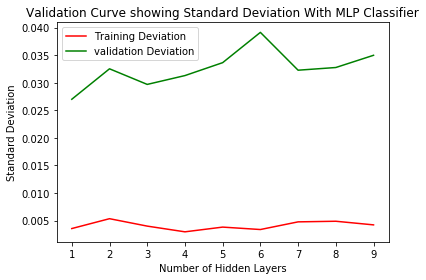

In [12]:
# Create plot of Standard Deviation of Accuracy Score
plt.plot(param_range, train_std, label="Training Deviation", color="r")
plt.plot(param_range, test_std, label="validation Deviation", color="g")
plt.title("Validation Curve showing Standard Deviation With MLP Classifier")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Standard Deviation")
plt.tight_layout()
plt.legend(loc="best")
plt.savefig ("figure2c")
plt.show()

In [13]:
#Maximum cross validated accuracy 
max(test_mean)

0.7766666666666668

In [14]:
#value of varied parameter at maximum accuracy 
print ("Number of Hidden Layers: %r" %param_range[np.argmax(test_mean)]) 

Number of Hidden Layers: 8


## Support Vector Machine 

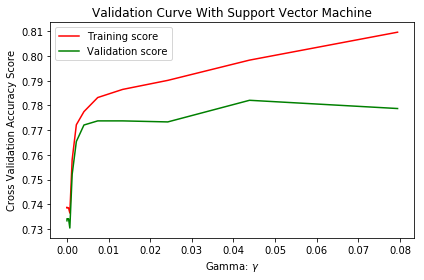

In [15]:
param_range =np.logspace(-6, -1.1, 20)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(svm.SVC( random_state=1), 
                                             x_extract, 
                                             y_df, 
                                             param_name="gamma", 
                                             param_range=param_range,
                                             cv=10, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="r")
plt.plot(param_range, test_mean, label="Validation score", color="g")

# Create plot
plt.title("Validation Curve With Support Vector Machine")
plt.xlabel(r"Gamma: $\gamma$")
plt.ylabel("Cross Validation Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.savefig ("figure3b")
plt.show()

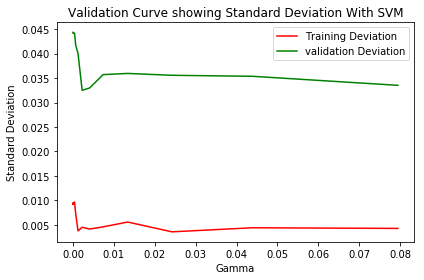

In [16]:
# Create plot of Standard Deviation of Accuracy Score
plt.plot(param_range, train_std, label="Training Deviation", color="r")
plt.plot(param_range, test_std, label="validation Deviation", color="g")
plt.title("Validation Curve showing Standard Deviation With SVM")
plt.xlabel("Gamma")
plt.ylabel("Standard Deviation")
plt.tight_layout()
plt.legend(loc="best")
plt.savefig ("figure3c")
plt.show()

In [17]:
#maximum cross validated accuracy 
max(test_mean)

0.7820833333333332

In [18]:
#value of varied parameter at maximum accuracy 
print ("Gamma: %f" % param_range[np.argmax(test_mean)]) 

Gamma: 0.043864


## More details


More information of how this code was run can be found in my blog post below: https://sites.tufts.edu/olukunleowolabi/2020/03/03/sentiment-analysis-using-word-embeddings/
